In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bert = pd.read_csv("df_alpine_bert.csv")

In [3]:
df_bert

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..Alpha-Pinene
0,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.106952
1,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.106952
2,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.106952
3,2,0.127047,0.111979,0.549845,0.036660,0.026879,-0.309649,0.654963,0.205110,-0.097057,...,0.146141,0.174652,-0.146565,0.217158,-0.712819,0.046792,-0.744437,-0.214183,-0.707376,0.106952
4,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.237772,0.120746,0.629375,0.104186,0.032603,-0.432701,0.764779,0.083739,-0.119063,...,0.171331,0.111348,-0.115894,0.320711,-0.736399,0.117869,-0.834123,-0.191543,-0.876954,0.021390
59996,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.021390
59997,42971,0.219584,0.143236,0.539909,0.086895,-0.006281,-0.389946,0.806679,0.186327,-0.065521,...,0.142024,0.141072,-0.212327,0.300115,-0.697690,0.069458,-0.770859,-0.155446,-0.747328,0.021390
59998,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.021390


In [4]:
df_bert.columns.to_list()

['index',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_

In [6]:
X = df_bert.drop(['X..Alpha-Pinene', 'index'], axis = 1)
y = df_bert[['X..Alpha-Pinene']]

<AxesSubplot:ylabel='Count'>

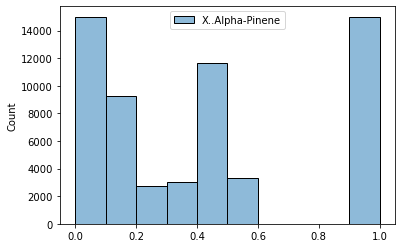

In [7]:
sns.histplot(y, bins = 10)

PCA

In [8]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [9]:
pca_comps

array([[ 1.72445382e+00, -6.10912187e-01, -2.74417797e-01, ...,
        -2.56365376e-03,  5.24716301e-04, -2.32476012e-08],
       [ 1.72445382e+00, -6.10912187e-01, -2.74417797e-01, ...,
        -2.56365376e-03,  5.24716301e-04, -2.32476079e-08],
       [-6.67419650e-01, -1.63826940e-01,  4.62091127e-01, ...,
         4.77574936e-04, -1.95786212e-03, -4.77250001e-08],
       ...,
       [-7.18483656e-01, -2.26408253e-01,  1.13179451e-01, ...,
         2.16486900e-03, -7.76386063e-04, -2.43678514e-08],
       [-1.60392496e+00,  3.98935142e-01, -2.72050637e-01, ...,
         3.04857414e-03,  3.63112169e-03, -2.75712020e-08],
       [-2.51735411e+00,  1.12599550e+00, -9.46549815e-02, ...,
         4.06109998e-04, -9.49540613e-04,  5.89113878e-08]])

In [10]:
type(pca_comps)

numpy.ndarray

In [11]:
explained_variance = pca.explained_variance_ratio_

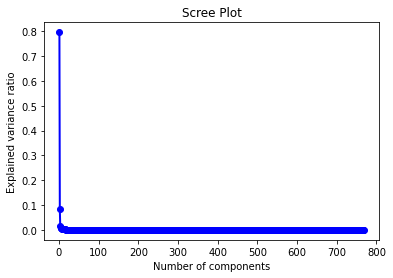

In [12]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [13]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [14]:
n_components_optimal

1

In [15]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [16]:
X_reduced

array([[ 1.72445382],
       [ 1.72445382],
       [-0.66741965],
       ...,
       [-0.71848366],
       [-1.60392496],
       [-2.51735411]])

In [17]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced = X_reduced.add_prefix('pca_')
X_reduced

,pca_0
0,1.724454
1,1.724454
2,-0.667420
3,1.145692
4,2.245212
...,...
59995,-1.589623
59996,2.929105
59997,-0.718484
59998,-1.603925


train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [19]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (before feature selection and hyperparameter tuning)

In [20]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [21]:
mean_absolute_error(y_val, y_pred_knreg)

0.042206690007976784

In [22]:
mean_squared_error(y_val, y_pred_knreg)

0.007533217020400851

In [23]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.08679410706033476

In [24]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9634594236132371

In [25]:
#val
r2_score(y_val, y_pred_knreg)

0.9438214904623781

RF (before feature selection and hyperparameter tuning)

In [26]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_4187/2685114911.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [27]:
mean_absolute_error(y_val, y_pred_rfreg)

0.029974320605479523

In [28]:
mean_squared_error(y_val, y_pred_rfreg)

0.005091456063506476

In [29]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07135443969022864

In [30]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9941647153482395

In [31]:
#val
r2_score(y_val, y_pred_rfreg)

0.9620307748669025

Hyperparameter tuning (kNN)

In [32]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [33]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [35]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [36]:
knreg_ht = KNeighborsRegressor(n_neighbors=5, weights='distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [37]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.023262477504589936

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.004740871118027097

In [39]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.06885398403888549

In [40]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9999562175401843

In [41]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9646452408579954

Hyperparameter tuning (RF)

In [42]:
parameters_rf = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [43]:
rscv_rf = RandomizedSearchCV(rfreg,  
                     parameters_rf,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [44]:
rscv_rf.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [45]:
rscv_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

RF (after hyperparameter tuning)

In [46]:
rfreg_ht = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, min_samples_split=2, max_features='auto', max_depth=None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg_ht = rfreg_ht.predict(X_val)
y_pred_rfreg_ht_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_4187/4034257106.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [47]:
mean_absolute_error(y_val, y_pred_rfreg_ht)

0.034168612405247066

In [48]:
mean_squared_error(y_val, y_pred_rfreg_ht)

0.005294319249793771

In [49]:
mean_squared_error(y_val, y_pred_rfreg_ht, squared = False)

0.07276207287999546

In [50]:
#train
r2_score(y_train1, y_pred_rfreg_ht_r2)

0.9869102038007755

In [51]:
#val
r2_score(y_val, y_pred_rfreg_ht)

0.9605179349454175

Predicting on the test set (kNN)

In [52]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [53]:
import joblib

joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_bert_alpine.pkl")
joblib.dump(y_test, "y_test_knreg_bert_alpine.pkl")

['y_test_knreg_bert_alpine.pkl']

In [54]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.023684569665941613

In [55]:
mean_squared_error(y_test, y_pred_knreg_test)

0.004796549801350592

In [56]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.06925712816274288

In [57]:
r2_score(y_test, y_pred_knreg_test)

0.9641274776311746

Error analysis (kNN)

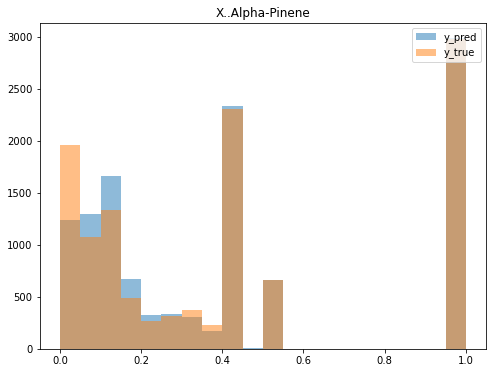

<Figure size 432x288 with 0 Axes>

In [58]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_bert_alpine.png')

Pearson R (kNN)

In [59]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.982
P-value: 0.000


Predicting on the test set (RF)

In [60]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [61]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_bert_alpine.pkl")
joblib.dump(y_test, "y_test_rfreg_bert_alpine.pkl")

['y_test_rfreg_bert_alpine.pkl']

In [62]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.034973067303709714

In [63]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.005476965673014891

In [64]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.07400652453003648

In [65]:
r2_score(y_test, y_pred_rfreg_test)

0.9590387712511201

Error analysis (RF)

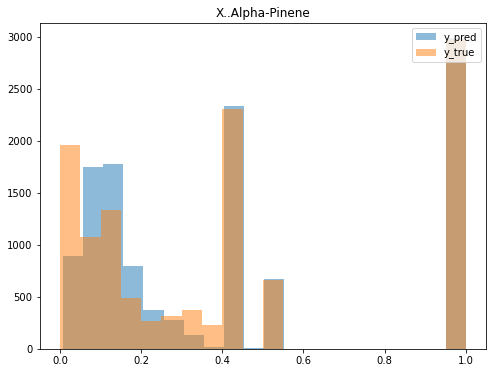

<Figure size 432x288 with 0 Axes>

In [66]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_bert_alpine.png')

Pearson R (RF)

In [67]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.979
P-value: 0.000
